In [6]:
import pandas as pd
import json
import os

from data_collector import SmithsonianDataCollector
from data_visualizer import SmithsonianDataVisualizer
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Retrieved 1283 items

Data successfully converted to DataFrame
Shape: (100, 11)


,id,title,type,url,date,topic,object_type,online_media_type,data_source,creators,thumbnail
0,ld1-1646149545906-1646149560279-0,View From Space: NASA's Evolving Struggle to U...,edanmdm,https://siris-libraries.si.edu/ipac20/ipac.jsp...,[2010s],[],['Books'],[],Smithsonian Libraries,,
1,sro-1663946979444-1663946984031-2,Redefining How NASA Gets into Space,edanmdm,https://airandspace.si.edu/stories/editorial/r...,[2020s],[],"['Blog', 'Smithsonian staff publications']",[],Smithsonian Libraries and Archives,"[{'type': 'author', 'content': 'Levasseur, Jen...",
2,ld1-1646149545906-1646150783389-0,NTRS [electronic resource] : NASA technical re...,edanmdm,https://siris-libraries.si.edu/ipac20/ipac.jsp...,[1990s],"['Aeronautics', 'Space flight']","['Technical reports', 'Electronic information ...",[],Smithsonian Libraries,['United States'],



Transformed data to JSON-LD format
Saved linked data to file: data/space_collections_linked_data.json

Creating visualizations...

Visualizations created and saved to data directory

Generating interactive dashboard...


Title,Type,Date,Source
View From Space: NASA's Evolving Struggle to Understand Our Home Planet,['Books'],['2010s'],Smithsonian Libraries
Redefining How NASA Gets into Space,"['Blog', 'Smithsonian staff publications']",['2020s'],Smithsonian Libraries and Archives
NTRS [electronic resource] : NASA technical reports server,"['Technical reports', 'Electronic information resources']",['1990s'],Smithsonian Libraries
National Aeronautics and Space Administration (NASA),"['Book Chapter', 'Smithsonian staff publications']",['2010s'],Smithsonian Libraries and Archives
The next 200 years in space : NASA bicentennial planning / by Herman Kahn and William Brown ; with contributions by Herbert Bernstein ... [et al.],['Books'],['1970s'],Smithsonian Libraries
"NASA Space Shuttle : 1981 onwards (all models) : an insight into the design, construction and operation of the Nasa Space Shuttle / David Baker",['Books'],['2010s'],Smithsonian Libraries
Life in Space NASA Life Sciences Research During the Late Twentieth Century,['Electronic information resources'],['2020s'],Smithsonian Libraries
The view from space NASA's evolving struggle to understand our home planet Richard B. Leshner and Thor Hogan,['Technical reports'],['2010s'],Smithsonian Libraries
"Proceedings of Conference on NASA Centers for Commercial Development of Space (NASA CCDS) : Albuquerque Hilton Hotel, Albuquerque, New Mexico, January 8-12, 1995 / editors Mohamed S. El-Genk, Raymond P. Whitten ; organized by Institute for Space and Nuclear Power Studies, University of New Mexico ; co-sponsored by Ballistic Missile Defense Organization ... [et al.] ; in cooperation with American I...",['Conferences'],['1990s'],Smithsonian Libraries
America in space : NASA's first fifty years / foreword by Neil Armstrong ; edited by Steven J. Dick [and others] ; with the assistance of the NASA Chief Historian's Office and the NASA Photo Departments,['Books'],"['1920s', '1910s', '1940s', '2000s', '1930s', '1900s', '1990s', '1960s', '1950s', '1980s', '1970s']",Smithsonian Libraries


Dashboard saved to file: data/dashboard.html

Smithsonian Linked Data Explorer completed successfully!


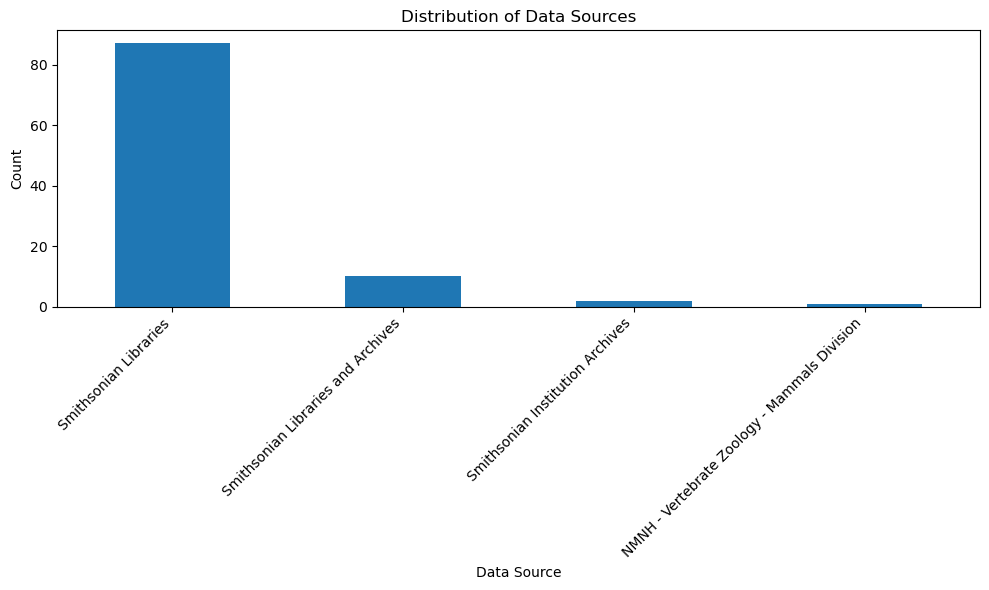

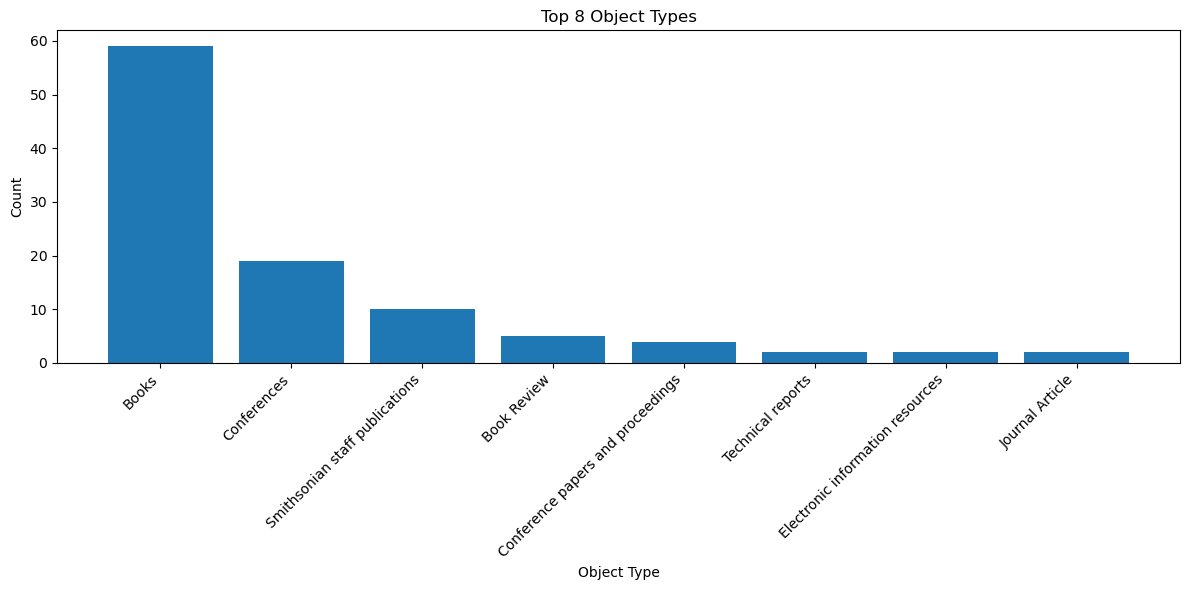

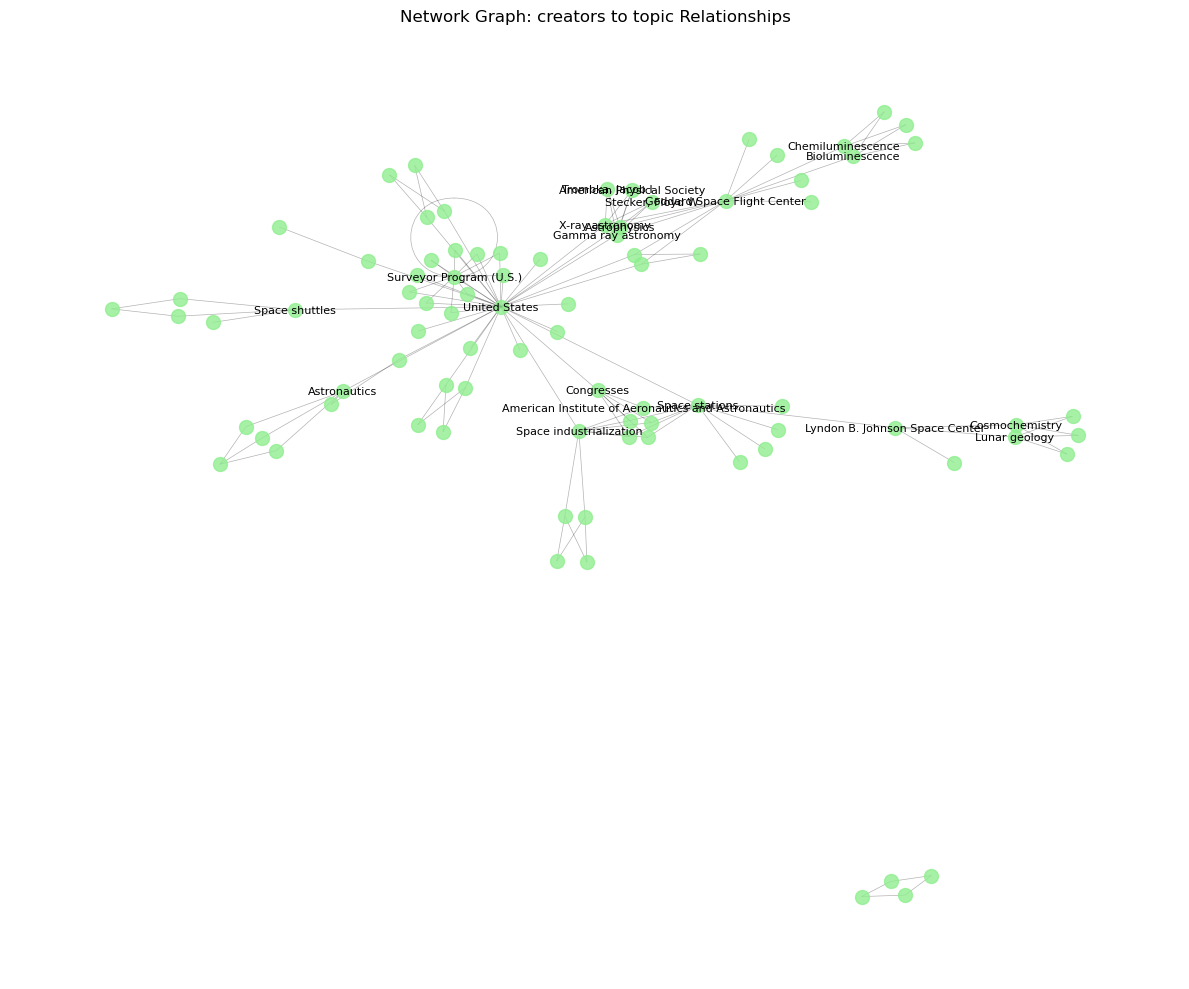

In [8]:
# Initialize the data collector
collector = SmithsonianDataCollector()

# 1. Collect data from the API
# Demo with space-related collections
print("Collecting data from Smithsonian API...")
space_data = collector.search_collections("space AND nasa", rows=100)
print(f"Retrieved {space_data['response']['rowCount']} items\n")

# 2. Convert to DataFrame for analysis
df = collector.convert_to_dataframe(space_data)
print("Data successfully converted to DataFrame")
print(f"Shape: {df.shape}")
display(df.head(3))

# 3. Transform to JSON-LD
json_ld = collector.transform_to_json_ld(df)
print("\nTransformed data to JSON-LD format")

# Save the JSON-LD to a file
os.makedirs('data', exist_ok=True)
with open('data/space_collections_linked_data.json', 'w') as f:
    json.dump(json_ld, f, indent=2)
print("Saved linked data to file: data/space_collections_linked_data.json\n")

# 4. Visualize the data
visualizer = SmithsonianDataVisualizer(df)

# Plot data sources
print("Creating visualizations...\n")
plt_sources = visualizer.plot_data_sources()
plt_sources.savefig('data/data_sources.png')

# Plot object types
plt_types = visualizer.plot_object_types(top_n=8)
plt_types.savefig('data/object_types.png')

# Create a network graph
plt_network = visualizer.create_network_graph(source_field='creators', target_field='topic', sample_size=30)
plt_network.savefig('data/relationship_network.png')

print("Visualizations created and saved to data directory\n")

# 5. Generate interactive dashboard
print("Generating interactive dashboard...")
dashboard = visualizer.create_interactive_dashboard()
display(dashboard)

# Save the dashboard HTML to a file
with open('data/dashboard.html', 'w') as f:
    f.write(dashboard.data)
print("Dashboard saved to file: data/dashboard.html")

print("\nSmithsonian Linked Data Explorer completed successfully!")